In [42]:
import pandas as pd
import json
import re
import random
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
stop_words = stopwords.words('english')
from textblob import TextBlob as TB

In [43]:
with open('TWEETS.json') as f:
    TWEETS = json.load(f)
how_many_tweets = {}

In [44]:
TWEETS.keys()

dict_keys(['realDonaldTrump', 'rickygervais', 'barackobama', 'jeffbezos', 'billgates', 'melindagates', 'beyonce', 'shakira', 'jack', 'elonmusk', 'charlizeafrica', 'jlo', 'loganpaul', 'neiltyson', 'JoeBiden', 'HillaryClinton', 'idriselba', 'RealHughJackman', 'ChrisEvans', 'katyperry', 'KSIOlajidebt', 'Maisie_Williams', 'emiliaclarke', 'AOC', 'SpeakerPelosi'])

In [45]:
l = list(TWEETS.keys())
for i in l:
    TWEETS[str((i).lower())] = TWEETS.pop(i)


In [46]:
del TWEETS["emiliaclarke"]
del TWEETS["beyonce"]
del TWEETS["shakira"]

In [47]:
for celeb in TWEETS.keys():
    how_many_tweets[celeb] =len(TWEETS[celeb].keys())

In [48]:
def clean_word(word):
    pattern = re.compile('[\W]+')
    
    se = ""
    words = word.split()
    
    for word in words:
        if "http" in word or "www" in word:
            words.remove(word)
            
    
    
    
    for word in words:
        if "@" in word or "#" in word:
            words.remove(word)
    
    
    for i in range(len(words)):
        word = words[i]
        
        
        words[i] = pattern.sub('', word.lower()).strip()
    
    for word in words:
        if "rt" == word:
            words.remove(word)
    for word in words:
        try:
            a = int(word)
            
            words.remove(word)
        except: pass
    
    for word in words:
        a = 0
        for i in range(10):
            i = str(i)
            if i in word:
                a = 1
        if a == 1:
            
            words.remove(word)
    
    for word in words:
        if type(word) != "str":
            words.remove(word)
    
    results = []
    for word in words:
        if word not in stop_words:
            results.append(word.strip())
    
    
    for word in results:
        if len(word) > 1:
            se += word+" "

    return se.strip()
    


In [49]:
for celeb in TWEETS.keys():
    tweets = []
    for tweet_id in TWEETS[celeb]:
        tweet = TWEETS[celeb][tweet_id]
        tweet = clean_word(tweet).split(" ")
        for word in tweet:
            if "http" in word or "www" in word or "youtu.be" in word:
                
                pass
            elif len(word)>1:
                tweets.append(word)
    
    TWEETS[celeb]= tweets

In [50]:
freq = {}
for celeb in TWEETS.keys():
    unique_ = len(set(TWEETS[celeb]))
    all_ = len(TWEETS[celeb])
    freq[(celeb).lower()] = [all_,unique_,unique_/float(all_)]

In [51]:
file = open("information.txt","r").readlines()
for i in file:
    username = (i.split("\t")[1][1:]).lower()
    gender = i.split("\t")[2]
    age = i.split("\t")[3].strip()
    if username in TWEETS:
        freq[username].append(gender)
        freq[username].append(age)


In [52]:
data = [[i,freq[i][0],freq[i][1],freq[i][2],freq[i][3],freq[i][4]] for i in freq]

In [53]:
df = pd.DataFrame(data,columns=["names","total_words","unique_words","ratio","gender","age"])

In [54]:
freq100 = {}
for celeb in TWEETS.keys():
    try:
        wordss = random.sample(TWEETS[celeb],900)
        unique_ = len(set(wordss))
        all_ = len(wordss)
        f = unique_/float(all_)
        freq100[celeb] = f
        
    except:
        freq100[celeb] = 0

In [55]:
df["unique_per900"] = list(freq100.values())

Text(0.5, 1.0, 'VOCAB SIZE / AGE')

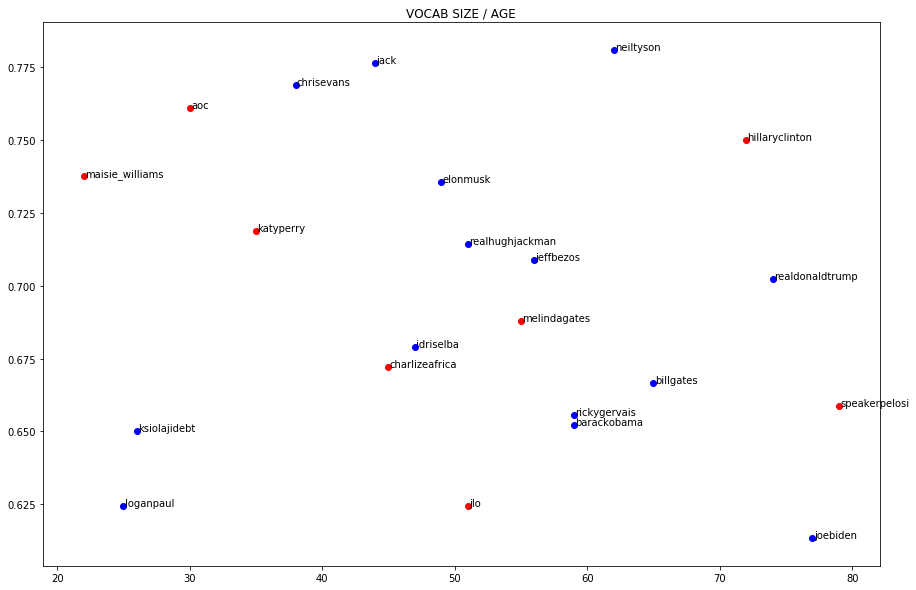

In [56]:
fig = plt.figure(figsize = (15,10))
for i in range(22): 
    row = df.iloc[i:i+1,:]
    name = row.names[i]
    age = int(row.age[i])
    gender = row.gender[i]
    un = row.unique_per900[i]
    
    if gender == "male":
        plt.scatter(age,un,color="blue")
        plt.text(age+0.1,un,name,rotation=0)
    else:
        plt.scatter(age,un,color="red")
        plt.text(age+0.1,un,(name).strip(),rotation=0)
plt.title("VOCAB SIZE / AGE")

In [57]:
TWEETS.keys()

dict_keys(['realdonaldtrump', 'rickygervais', 'barackobama', 'jeffbezos', 'billgates', 'melindagates', 'jack', 'elonmusk', 'charlizeafrica', 'jlo', 'loganpaul', 'neiltyson', 'joebiden', 'hillaryclinton', 'idriselba', 'realhughjackman', 'chrisevans', 'katyperry', 'ksiolajidebt', 'maisie_williams', 'aoc', 'speakerpelosi'])

# popular words 

In [58]:
counter = {}
for celeb in TWEETS:
    
    c = {}
    for word in TWEETS[celeb]:
        if word not in c:
            c[word] = 1
        else:
            c[word] += 1
            
    cc = []
    
    for k in c:
        cc.append((c[k],k))
        
    cc.sort()
    
    counter[celeb] = cc[::-1]

In [59]:
counter.keys()

dict_keys(['realdonaldtrump', 'rickygervais', 'barackobama', 'jeffbezos', 'billgates', 'melindagates', 'jack', 'elonmusk', 'charlizeafrica', 'jlo', 'loganpaul', 'neiltyson', 'joebiden', 'hillaryclinton', 'idriselba', 'realhughjackman', 'chrisevans', 'katyperry', 'ksiolajidebt', 'maisie_williams', 'aoc', 'speakerpelosi'])

In [60]:
counter['rickygervais'][:10]

[(23, 'life'),
 (19, 'im'),
 (19, 'dont'),
 (17, 'netflix'),
 (16, 'time'),
 (15, 'think'),
 (13, 'show'),
 (13, 'new'),
 (13, 'favourite'),
 (12, 'vote')]

# basic sentiment analysis

In [61]:
TB("love").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [62]:
sent_dict = {}
for celeb in TWEETS:
    one_sent = ""
    
    for word in TWEETS[celeb]:
        one_sent+= word+" "
        
    pne_sent = one_sent.strip()
    
    sent_dict[celeb] =TB(one_sent).sentiment

In [63]:
sent_dict

{'realdonaldtrump': Sentiment(polarity=0.20320232399179766, subjectivity=0.5322303865724917),
 'rickygervais': Sentiment(polarity=0.16429603393239747, subjectivity=0.5725907997726181),
 'barackobama': Sentiment(polarity=0.22435312668395394, subjectivity=0.4801889825574036),
 'jeffbezos': Sentiment(polarity=0.32174582362082343, subjectivity=0.54037296037296),
 'billgates': Sentiment(polarity=0.24671536447648637, subjectivity=0.5348415349962743),
 'melindagates': Sentiment(polarity=0.23631518321970071, subjectivity=0.5226666118503908),
 'jack': Sentiment(polarity=0.23849825078022752, subjectivity=0.48164934225980766),
 'elonmusk': Sentiment(polarity=0.18285267173903544, subjectivity=0.5118221063448337),
 'charlizeafrica': Sentiment(polarity=0.2400117501546072, subjectivity=0.5176955029097889),
 'jlo': Sentiment(polarity=0.3305156784202417, subjectivity=0.5550971556106411),
 'loganpaul': Sentiment(polarity=0.09479591370347684, subjectivity=0.537061157019141),
 'neiltyson': Sentiment(polar

In [64]:
p = []
s = []
for pr in sent_dict:
    pr = sent_dict[pr]
    p.append(pr.polarity)
    s.append(pr.subjectivity)    

In [65]:
df["polarity"] = p
df["subjectivity"] =s

Text(0.5, 1.0, 'Polarity / Subjectivity')

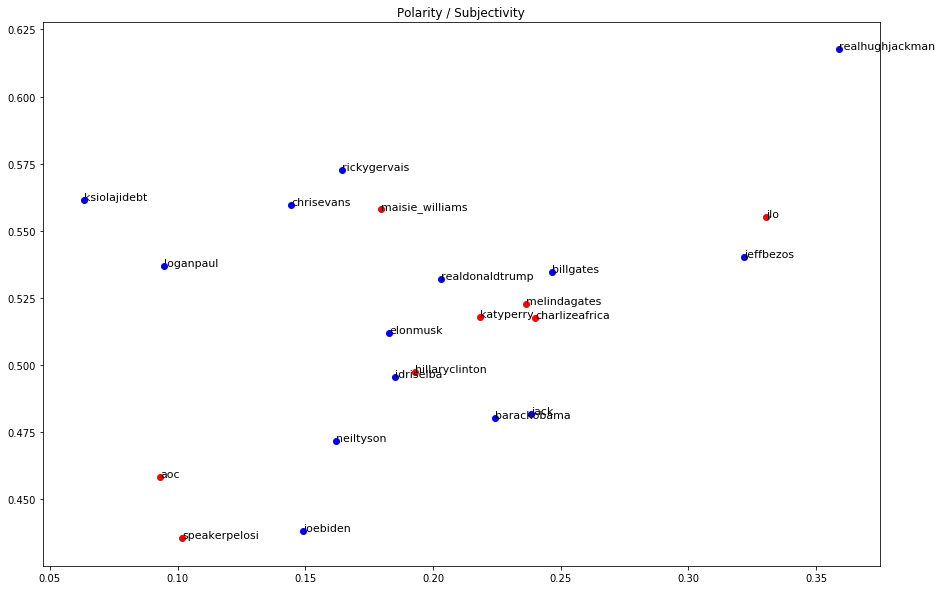

In [66]:
angles = range(0,90)


fig2 = plt.figure(figsize = (15,10))
for i in range(22): 
    row = df.iloc[i:i+1,:]
    name = row.names[i]
    gender = row.gender[i]
    pp = row.polarity[i]
    ss = row.subjectivity[i]
    angle = 0
    if gender == "male":
        plt.scatter(pp,ss,color="blue")
        plt.text(pp,ss,name,rotation=angle,size=11)
    else:
        plt.scatter(pp,ss,color="red")
        plt.text(pp,ss,name,rotation=angle,size=11)
plt.title("Polarity / Subjectivity")

In [67]:
e_words = [(i).split('"')[1] for i in open("we.txt","r").readlines()[1:-1]]
e_words.sort()

In [68]:
let = {}

In [69]:
for word in e_words:
    l = word[:1]
    if l in let:
        pass
    else:
        let[l] = e_words.index(word)
        
let["end"] = len(e_words)

In [70]:
real_words = {}

In [71]:
ks = list(let.keys())
for celeb in TWEETS:
    ws = []
    for word in TWEETS[celeb]:
        l = word[0]
        try:
            currentl = let[ks[ks.index(l)]]
            nextl = let[ks[ks.index(l)+1]]
            if word in e_words[currentl:nextl]:
                ws.append(word)
        except:
            pass
    real_words[celeb] = ws

In [72]:
rwa = []
rwu = []

for celeb in real_words:
    rwa.append(len(real_words[celeb]))
    rwu.append(len(set(real_words[celeb])))

In [73]:
df["correct_words"] = rwa
df["correct_words_u"] = rwu

# who is better writter?

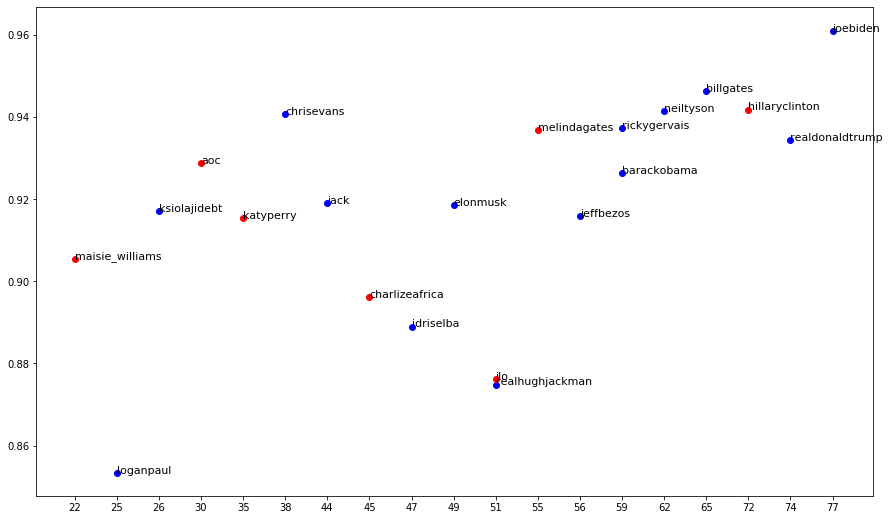

In [74]:
fig3 = plt.figure(figsize = (15,9))

li = []
for i in range(21): 
    row = df.iloc[i:i+1,:]
    
    name = row.names[i]
    age = row.age[i]
    gender = row.gender[i]
    c = row.correct_words[i]
    a = row.total_words[i]
    
    r = float(c)/a
    
    li.append((age,r,name,gender))
    

li.sort()

for i in li:
    gender = i[3]
    name = i[2]
    r= i[1]
    age = i[0]
    
    if gender == "male":
        plt.scatter(age,r,color="blue")
        plt.text(age,r,name,rotation=angle,size=11)
    else:
        plt.scatter(age,r,color="red")
        plt.text(age,r,name,rotation=angle,size=11)
    